# 데이터 스케일링(Data Scaling)

데이터 스케일링이란 데이터 전처리 과정 중의 하나입니다.

피처(feature)들마다 데이터값의 범위가 다 제각각이기 때문에 범위 차이가 클 경우 데이터를 갖고 모델을 학습할 때 0으로 수렴하거나 무한으로 발산할 수 있습니다.

따라서 데이터 스케일링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해줄 수 있습니다.

저는 sklearn의 5가지 스케일링 방법을 소개하겠습니다.

sklearn의 breast cancer dataset을 활용하여 데이터 스케일링을 연습해보겠습니다.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

데이터 확인

In [2]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.9035


# (1) StandardScaler()

StandardScaler는 모든 피처들을 평균이 0, 분산이 1인 정규분포를 갖도록 만들어줍니다.

즉, 표준화해주는 방법이죠.

이 방법의 경우 데이터 내에 이상치가 있다면 데이터의 평균과 분산에 크게 영향을 주기 때문에 스케일링 방법으로 적절하지 않습니다.

sklearn 으로 데이터 스케일링을 할 경우, 훈련용 데이터셋과 테스트용 데이터셋에 각각 다른 과정이 필요합니다.

훈련용 데이터셋은 fit 메서드를 적용시킨 후 transform 해주어야 하고, 테스트용 데이터셋에는 transform 을 적용시켜주면 됩니다.

StandardScaler를 import 해주고, 데이터 스케일링을 진행해보았습니다.

In [6]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


In [7]:
X_train

array([[1.916e+01, 2.660e+01, 1.262e+02, ..., 1.872e-01, 3.258e-01,
        9.720e-02],
       [1.831e+01, 1.858e+01, 1.186e+02, ..., 1.571e-01, 3.206e-01,
        6.938e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       ...,
       [1.795e+01, 2.001e+01, 1.142e+02, ..., 1.185e-01, 4.882e-01,
        6.111e-02],
       [1.955e+01, 2.877e+01, 1.336e+02, ..., 1.941e-01, 2.818e-01,
        1.005e-01],
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02]])

In [8]:
X_train_scaled

array([[ 1.40381088,  1.79283426,  1.37960065, ...,  1.044121  ,
         0.52295995,  0.64990763],
       [ 1.16565505, -0.14461158,  1.07121375, ...,  0.5940779 ,
         0.44153782, -0.85281516],
       [-0.0307278 , -0.77271123, -0.09822185, ..., -0.64047556,
        -0.31161687, -0.69292805],
       ...,
       [ 1.06478904,  0.20084323,  0.89267396, ...,  0.01694621,
         3.06583565, -1.29952679],
       [ 1.51308238,  2.3170559 ,  1.67987211, ...,  1.14728703,
        -0.16599653,  0.82816016],
       [-0.73678981, -1.02636686, -0.74380549, ..., -0.31826862,
        -0.40713129, -0.38233653]])

데이터를 직접 불러와서 보았을 때, 데이터값의 범위가 변화한 것을 볼 수 있습니다.

숫자로 보니 직관적이지 않아 그래프로 그려보겠습니다.

데이터셋은 numpy array 이기 때문에 shape을 열 1개로 바꾸어서 플로팅해주겠습니다.

In [9]:
X_train_scaled.shape

(455, 30)

In [10]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

# before scaling

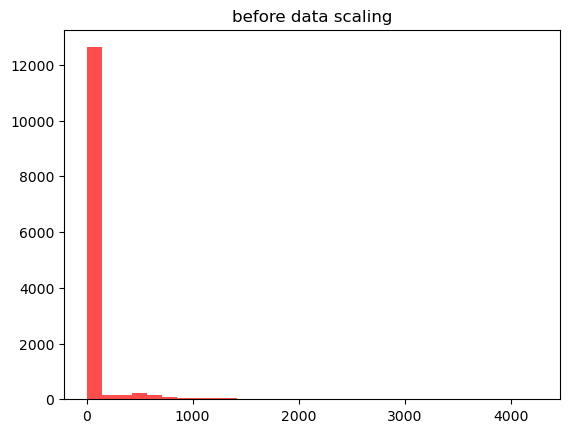

In [11]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

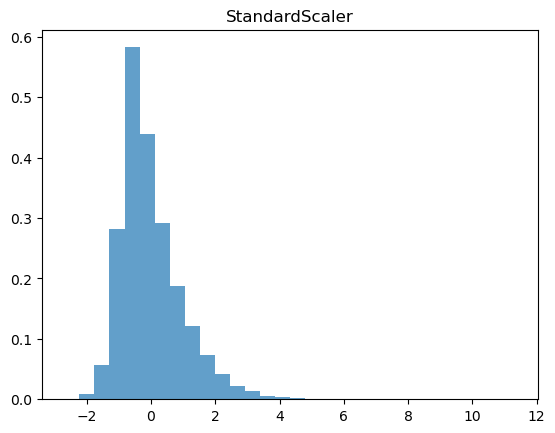

In [12]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

# (2) MinMaxScaler()

MinMaxScaler는 모든 피처들이 0과 1사이의 데이터값을 갖도록 만들어줍니다.

즉, 피처별로 최솟값은 0이 되고, 최댓값은 1이 되는 것이죠.

데이터가 2차원인 겅우, 모든 데이터는 x, y 축의 0과 1 사이에 존재하게 됩니다.

이 방법 또한 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 되기 때문에 스케일링 방법으로 적절하지 않습니다.

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


In [14]:
X_train_scaled

array([[0.56168275, 0.7081761 , 0.55664674, ..., 0.64329897, 0.33372758,
        0.27653155],
       [0.52005485, 0.37190776, 0.50256191, ..., 0.53986254, 0.32347723,
        0.09405746],
       [0.31093589, 0.26289308, 0.29746655, ..., 0.25611684, 0.22866154,
        0.11347239],
       ...,
       [0.50242421, 0.43186583, 0.47124964, ..., 0.40721649, 0.65385374,
        0.03981372],
       [0.5807826 , 0.79916143, 0.60930828, ..., 0.66701031, 0.24699389,
        0.29817657],
       [0.18752143, 0.21886792, 0.18424424, ..., 0.33017182, 0.2166371 ,
        0.1511872 ]])

값의 범위?

In [15]:
X_train_scaled_mms = X_train_scaled.reshape(13650,1)

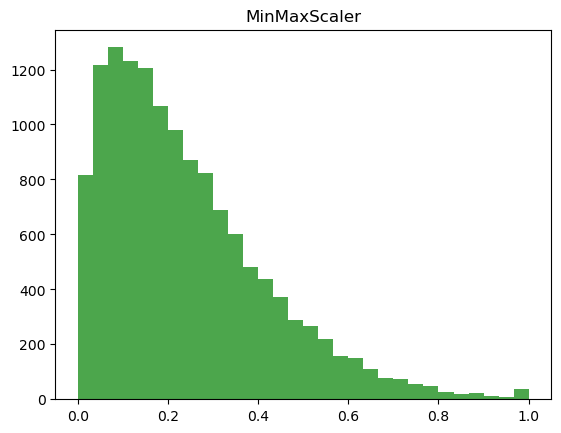

In [16]:
plt.hist(X_train_scaled_mms, bins=30, color='green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

# (3) MaxAbsScaler()

MaxAbsScaler는 MinMaxScaler와 비슷한데요!

방법의 이름에서도 알 수 있듯이 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 만들어줍니다.

즉, 0을 기준으로 절댓값이 가장 큰 수가 1또는 -1의 값을 가지게 됩니다.

마찬가지로, 이상치의 영향을 크게 받기 때문에 이상치가 존재할 경우 이 방법은 적절하지 않습니다.

In [17]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.886


In [18]:
X_train_scaled

array([[0.68160797, 0.79261025, 0.66949602, ..., 0.64329897, 0.49081049,
        0.46843373],
       [0.65136962, 0.55363528, 0.62917772, ..., 0.53986254, 0.4829768 ,
        0.33436145],
       [0.49946638, 0.4761621 , 0.47628647, ..., 0.25611684, 0.41051522,
        0.34862651],
       ...,
       [0.63856279, 0.59624553, 0.60583554, ..., 0.40721649, 0.73546249,
        0.29450602],
       [0.69548203, 0.85727056, 0.70875332, ..., 0.66701031, 0.42452546,
        0.48433735],
       [0.40981857, 0.44487485, 0.39188329, ..., 0.33017182, 0.4013257 ,
        0.37633735]])

In [19]:
X_train_scaled_mas = X_train_scaled.reshape(13650,1)

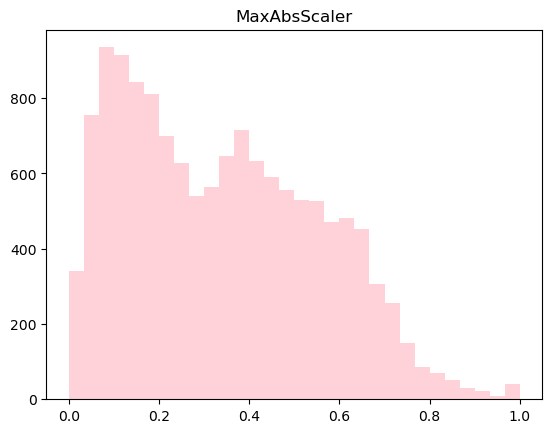

In [21]:
plt.hist(X_train_scaled_mas, bins=30, color='pink', alpha = 0.7)
plt.title('MaxAbsScaler')
plt.show()

# (4) RobustScaler()

RobustScaler는 StandardScaler와 비슷합니다.

다만, StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 중간값(median)과 사분위값(quartile)을 사용합니다.

따라서, 이상치의 영향을 최소화할 수 있겠습니다.

StandardScaler와 비교하였을 때, RobustScaler를 활용하면 표준화 후 데이터가 더 넓게 분포해있습니다.

In [22]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.8947


In [23]:
X_train_scaled

array([[ 1.36170213,  1.42597639,  1.34367099, ...,  0.83828187,
         0.63836018,  0.78497281],
       [ 1.1607565 , -0.03088102,  1.08747682, ...,  0.54038005,
         0.56222548, -0.59021256],
       [ 0.15130024, -0.50317893,  0.11596157, ..., -0.27682106,
        -0.1420205 , -0.44389521],
       ...,
       [ 1.07565012,  0.22888283,  0.93915389, ...,  0.15835313,
         3.01610542, -0.99901137],
       [ 1.45390071,  1.82016349,  1.59312321, ...,  0.90657165,
        -0.00585652,  0.94809689],
       [-0.44444444, -0.69391462, -0.42036069, ..., -0.06353919,
        -0.23133236, -0.15966387]])

In [24]:
X_train_scaled_rbs = X_train_scaled.reshape(13650,1)

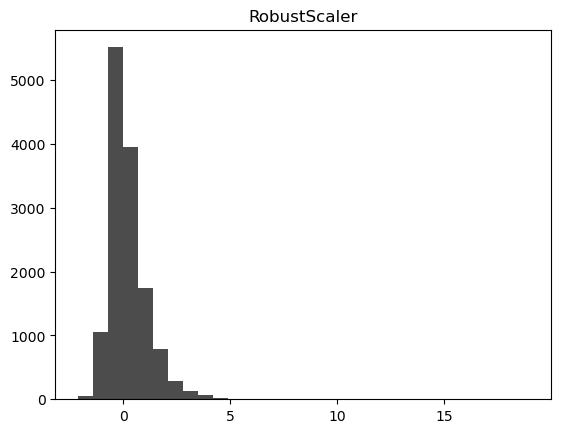

In [25]:
plt.hist(X_train_scaled_rbs, bins=30, color='black', alpha = 0.7)
plt.title('RobustScaler')
plt.show()

# (5) Normalizer()

앞의 4가지 방법은 각 피처(feature)의 통계치를 이용합니다.

즉, 열(columns)를 대상으로 합니다.

그러나 Normalizer 의 경우 각 행(row)마다 정규화가 진행됩니다.

이는 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어줍니다.

이렇게 하면 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있다고 합니다..

In [26]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_train_scaled = norm.fit_transform(X_train)
X_test_scaled = norm.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9211


In [27]:
X_train_scaled

array([[9.22211661e-03, 1.28031473e-02, 6.07427514e-02, ...,
        9.01033522e-05, 1.56814488e-04, 4.67844329e-05],
       [1.03861667e-02, 1.05393215e-02, 6.72746788e-02, ...,
        8.91134236e-05, 1.81857184e-04, 3.93551199e-05],
       [1.43548748e-02, 1.63383831e-02, 9.17934942e-02, ...,
        7.62014828e-05, 2.78611352e-04, 7.39623677e-05],
       ...,
       [1.11556685e-02, 1.24359291e-02, 7.09736683e-02, ...,
        7.36460568e-05, 3.03409324e-04, 3.79789918e-05],
       [8.54812786e-03, 1.25795211e-02, 5.84158507e-02, ...,
        8.48691364e-05, 1.23215470e-04, 4.39430614e-05],
       [1.77702285e-02, 2.30303396e-02, 1.13948505e-01, ...,
        1.48208642e-04, 4.10936535e-04, 1.20458086e-04]])

In [28]:
X_train_scaled_norm = X_train_scaled.reshape(13650,1)

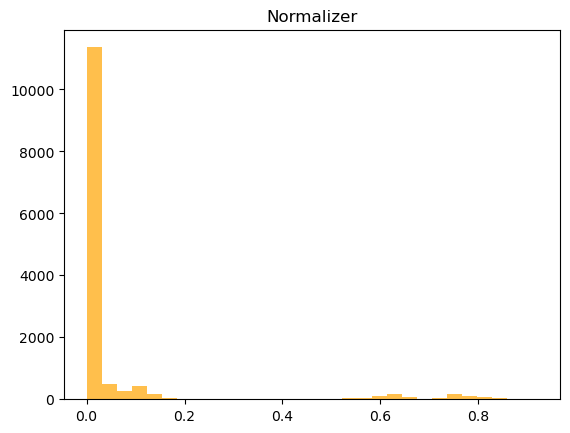

In [30]:
plt.hist(X_train_scaled_norm, bins=30, color='orange', alpha = 0.7)
plt.title('Normalizer')
plt.show()

데이터를 그려보았을 때, 0 근처에서 데이터값이 다 모여있는 것을 확인할 수 있네요.

x축의 범위도 가장 작습니다.

이렇게 오늘은 데이터 스케일링의 5가지 방법에 대해 설명해보았습니다.

유방암 데이터셋을 활용한 SVC 분류 알고리즘 모델에서는 Normalizer 방법에서 모델의 정확도가 가장 상승했는데요!

dataset과 사용하는 알고리즘에 따라 가장 적절한 스케일링 방법이 다르다고 합니다.

데이터 스케일링 과정을 거친다면 더 정확한 머신러닝을 할 수 있을 것 같아요.

읽어주셔서 감사합니다 :)

# 간단하게 정리

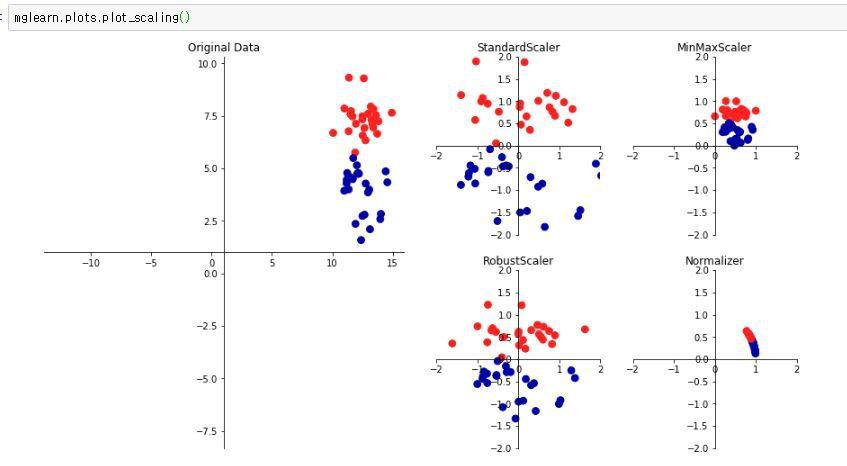

# Normalizer

피처 벡터의 유클리디안 거리(Euclidean distance)가 1이 되도록 데이터를 재조정한다(맨 위의 mglearn 그래프를 보면 이해가 쉽다). KNN, K-means, SVM과 같이 피처의 범위에 영향을 많이 받는 distance-based algorithm을 이용할 때 전처리 방식으로 자주 등장한다. 학생 A,B,C,D,E의 성적과 미래 임금을 가지고 예를 들어보자. 임금의 단위는 '000 Rupee이다.

In [31]:
data = {'CGPA': [3.0, 3.0, 4.0, 4.1, 4.2],
       'Salary(000)': [60, 40, 40, 50, 52]}

df = pd.DataFrame(data, index=['A', 'B', 'C', 'D', 'E'])
df

,CGPA,Salary(000)
A,3.0,60
B,3.0,40
C,4.0,40
D,4.1,50
E,4.2,52


 CGPA와 임금은 다른 척도를 가진 피처이다. 이 데이터들을 그냥 사용하면 크기가 큰 임금 피처에 더 큰 가중치가 부여될 가능성이 있다. 우리는 기계 학습 알고리즘이 하나의 특성에 치우치지 않기를 바란다. 따라서 기계 학습 알고리즘을 사용하기 전에 데이터를 스케일링하여 모든 피처 결과에 동일하게 기여하도록 한다.

In [32]:
from sklearn.preprocessing import Normalizer

X = df.values
normalizer = Normalizer()
X_scaled = normalizer.fit_transform(X)
new_df = pd.DataFrame(X_scaled, index=['A', 'B', 'C', 'D', 'E'], columns=['CGPA', 'Salary(000)'])
new_df

,CGPA,Salary(000)
A,0.049938,0.998752
B,0.074790,0.997199
C,0.099504,0.995037
D,0.081726,0.996655
E,0.080507,0.996754


Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
This transformer is able to work both with dense numpy arrays and scipy.sparse matrix (use CSR format if you want to avoid the burden of a copy / conversion).
Scaling inputs to unit norms is a common operation for text classification or clustering for instance. For instance the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

MinMaxScaler는 공식을 봐도 알 수 있지만, 최솟값과 최댓값의 범위를 기준으로 그 비율만큼 데이터 포인트가 재조정된다.
즉 각 column의 통계치가 계산에 반영된다(이것은 StandardScaler, RobustScaler도 마찬가지). 하지만 Normalizer을 사용할 경우 각 표본(데이터 행렬의 각 row)은 다른 표본과 독립적으로 재조정된다. default norm으로는 L2 Distance가 이용된다.